In [1]:
import pandas as pd
import matplotlib
import json
from pandas.io.json import json_normalize

#Changing default parameters of graph title and axes
params = {'axes.titlesize':'15',
          'axes.labelsize':'14',
          'xtick.labelsize':'13',
          'ytick.labelsize':'13'}
matplotlib.rcParams.update(params)

#load world_bank_projects.json as Pandas dataframe, wbp_data
wbp_data = pd.read_json(r"C:\Users\melin\Documents\Springboard Data Science Career Track\JSON Based Data Exercise\1574117884_data_wrangling_json_5_\data_wrangling_json\data\world_bank_projects.json")
#view dimensions of wbp_data dataframe
print(wbp_data.shape)
#view first 5 rows of wbp_data dataframe
wbp_data.head()

(500, 50)


,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}


****
## Question 1: Find the 10 countries with most projects

In [2]:
#find top 10 countries with most projects
print('Top 10 Countries With Most World Bank Projects')
Q1_df = wbp_data['countryname'].value_counts().rename_axis('Country').reset_index(name = 'Number of Projects').head(10)
Q1_df

Top 10 Countries With Most World Bank Projects


,Country,Number of Projects
0,Republic of Indonesia,19
1,People's Republic of China,19
2,Socialist Republic of Vietnam,17
3,Republic of India,16
4,Republic of Yemen,13
5,Kingdom of Morocco,12
6,Nepal,12
7,People's Republic of Bangladesh,12
8,Republic of Mozambique,11
9,Africa,11


[Text(0,0.5,'Number of Projects'), Text(0.5,0,'Country')]

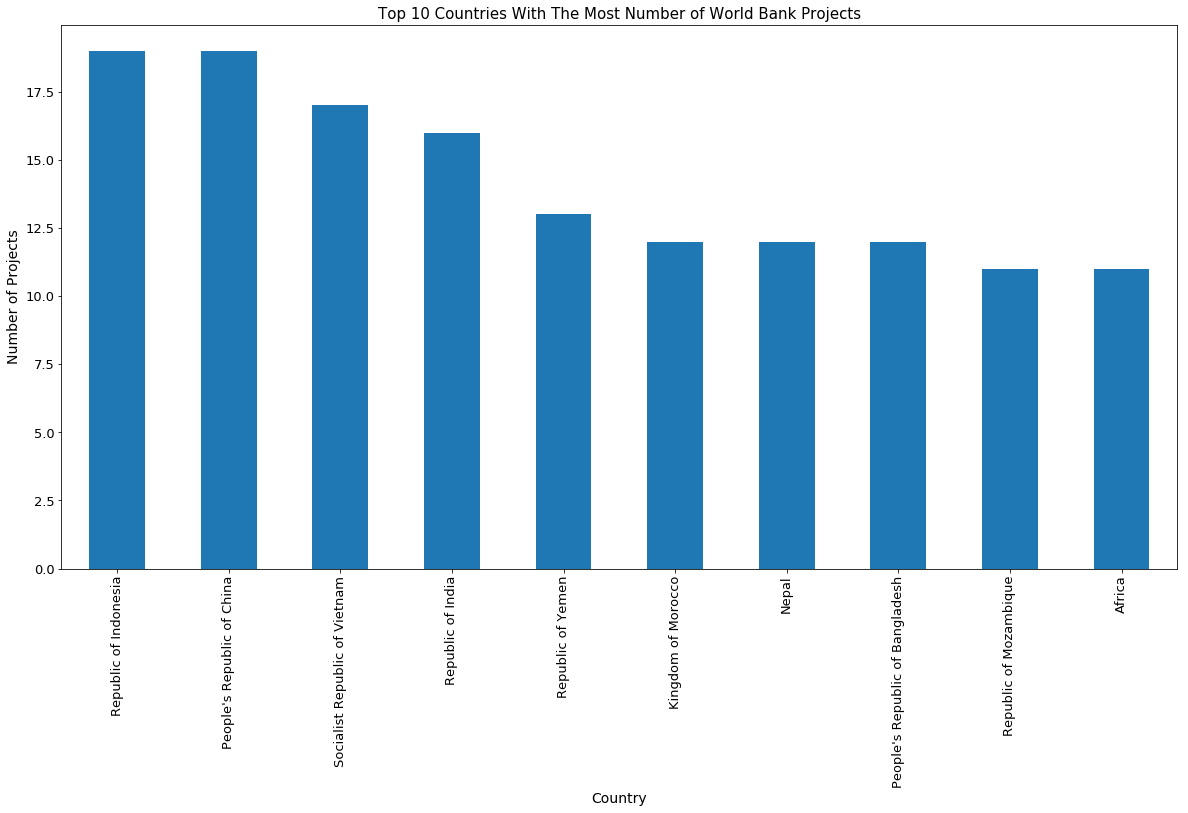

In [10]:
#Create bar graph to display the number of projects each country had.
ax = Q1_df.plot.bar(x = 'Country', y = 'Number of Projects', legend = False, title = 'Top 10 Countries With The Most Number of World Bank Projects', figsize = (20,10))
ax.set(xlabel="Country", ylabel="Number of Projects") #set x and y labels

People's Republic of China, Republic of Indonesia, Socialist Republic of Vietnam, Republic of India, Republic of Yemen, People's Republic of Bangladesh, Nepal, Kingdom of Morocco, Africa, and Republic of Mozambique are the top 10 countries with the most world bank projects.

## Question 2: Find the top 10 major project themes (using column 'mjtheme_namecode')

In [4]:
#appears to be a one to many relationship between mjtheme_namecode (name and code) to id 
p_themes = json_normalize(wbp_data.to_dict('records'), 'mjtheme_namecode', ['id'])
#multiple theme codes appear for several projects
p_themes.groupby('id').code.nunique().sort_values(ascending = False)
#find top 10 project major themes
print('Top 10 Major Project Themes of World Bank Projects')
Q2_df = p_themes.name.value_counts().rename_axis('Project Major Theme Name').reset_index(name = 'Count').head(10)
Q2_df

Top 10 Major Project Themes of World Bank Projects


,Project Major Theme Name,Count
0,Environment and natural resources management,223
1,Rural development,202
2,Human development,197
3,Public sector governance,184
4,Social protection and risk management,158
5,Financial and private sector development,130
6,,122
7,Social dev/gender/inclusion,119
8,Trade and integration,72
9,Urban development,47


[Text(0,0.5,'Count'), Text(0.5,0,'Project Major Theme Name')]

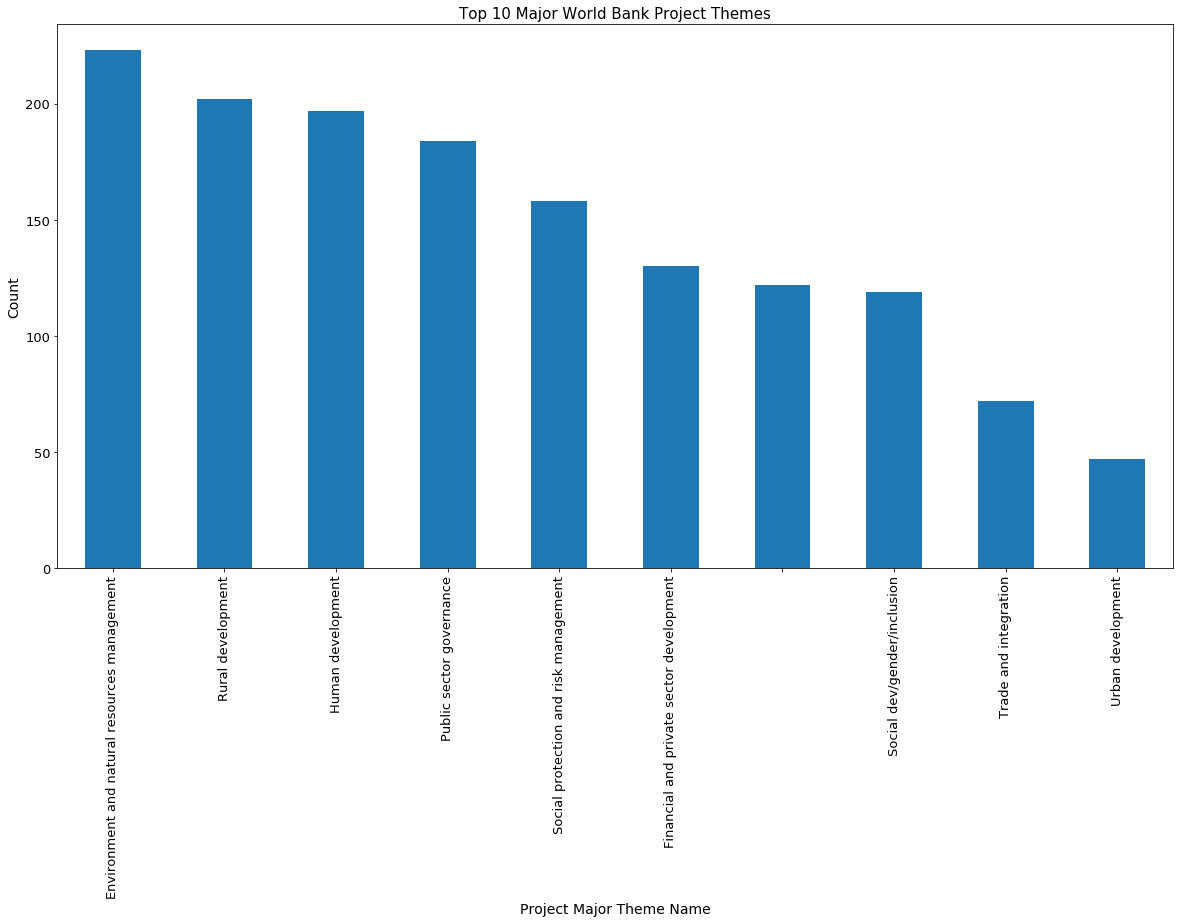

In [5]:
#Create bar graph to display the total number of each project major theme had.
ax2 = Q2_df.plot.bar(x = 'Project Major Theme Name', y = 'Count', legend = False, title = 'Top 10 Major World Bank Project Themes', figsize = (20,10))
ax2.set(xlabel="Project Major Theme Name", ylabel="Count") #set x and y labels

Environment and natural resources management, rural development, human development, public sector governance, social protection and risk management, financial and private sector development, (blank), social dev/gender/inclusion, trade and integration, and urban development are the top ten major world bank project themes.

## Question 3: In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [6]:
#create table to see code of missing name
p_themes_missing = p_themes.groupby('name').code.max().sort_values(ascending = False)
#remove row with missing name
p_themes_missing = p_themes_missing[p_themes_missing.index != '']
#convert to pandas dataframe
p_themes_missing = pd.DataFrame(p_themes_missing, columns = ['code'])
#copy name into a separate column (name_clean)
p_themes_missing['name_clean'] = p_themes_missing.index
#set code column to be the index in the p_themes_missing dataframe
p_themes_missing = p_themes_missing.set_index(['code']) 
#merge dataframes p_themes and p_themes_merge on the name based on the code of the missing project
p_themes_cleaned = p_themes.merge(p_themes_missing, how='outer', left_on=['code'], right_index=True)

#check if dataframes p_themes and p_themes_merge are neatly merged into p_themes_cleaned dataframe
print(p_themes.shape)
print(p_themes_cleaned.shape)

(1499, 3)
(1499, 4)


Find the top 10 project themes by name after filling in the missing names based on the theme code

In [7]:
#pre cleaned data
print('Top 10 Major World Bank Problem Themes (Original):')
print(p_themes.name.value_counts().head(10))
print('---------------------------------------------------')

#cleaned data
print('Top 10 Major World Bank Problem Themes (Cleaned):')
print(p_themes_cleaned.name_clean.value_counts().head(10))
print('---------------------------------------------------')

Top 10 Major World Bank Problem Themes (Original):
Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64
---------------------------------------------------
Top 10 Major World Bank Problem Themes (Cleaned):
Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development  

## Collapse cleaned data and merge back to original data

In [8]:
#make a list of theme names from p_themes_cleaned by id 
p_theme_names = pd.DataFrame(p_themes_cleaned.groupby('id').apply(lambda x: '|'.join(x['name_clean'])), columns = ['theme_names'])
#make a list of theme codes from p_themes_cleaned by id
p_theme_codes = pd.DataFrame(p_themes.groupby('id').apply(lambda x: '|'.join(x['code'])), columns = ['theme_codes'])
#create an id level reference level table to be used to merge to the original data
p_theme_ref = p_theme_names.merge(p_theme_codes, left_index = True, right_index = True)

#check dimensions of p_theme_ref dataframe
print(p_theme_ref.shape)
#view first 5 rows of p_theme_ref dataframe
p_theme_ref.head()

(500, 2)


,theme_names,theme_codes
id,,
P075941,Trade and integration|Social dev/gender/inclus...,4|7|10|5
P085621,Environment and natural resources management|E...,11|7|11|11
P086592,Environment and natural resources management|R...,11|10|10|10
P094183,Trade and integration|Trade and integration|Ru...,10|5|5
P095003,Trade and integration|Rural development,5|10


Finally, merge collapsed "|" separated list of theme codes and names for each row in the original data.

In [9]:
#merge cleaned fields of p_theme_ref dataframe to original dataframe (wbp_data)
data_cleaned = wbp_data.merge(p_theme_ref, how = 'right', left_on = ['id'], right_index = True)

#check the dimensions of data_cleaned dataframe to make sure the shape of the dataframe has not changed
print(wbp_data.shape)
print(data_cleaned.shape) #expect to see just 2 additional columns

#check certain fields of the cleaned data to see the removal of missing theme names
data_cleaned[['id', 'mjtheme_namecode', 'theme_names', 'theme_codes']].head(10)

(500, 50)
(500, 52)


,id,mjtheme_namecode,theme_names,theme_codes
0,P129828,"[{'code': '8', 'name': 'Human development'}, {...",Human development|Environment and natural reso...,8|11
1,P144674,"[{'code': '1', 'name': 'Economic management'},...",Economic management|Social protection and risk...,1|6
2,P145310,"[{'code': '5', 'name': 'Trade and integration'...",Environment and natural resources management|S...,5|2|11|6
3,P144665,"[{'code': '7', 'name': 'Social dev/gender/incl...",Social dev/gender/inclusion|Social dev/gender/...,7|7
4,P144933,"[{'code': '5', 'name': 'Trade and integration'...",Trade and integration|Financial and private se...,5|4
5,P146161,"[{'code': '6', 'name': 'Social protection and ...",Social protection and risk management|Social p...,6|6
6,P121185,"[{'code': '2', 'name': 'Public sector governan...",Public sector governance|Financial and private...,2|4
7,P127033,"[{'code': '11', 'name': 'Environment and natur...",Human development|Environment and natural reso...,11|8
8,P130164,"[{'code': '10', 'name': 'Rural development'}, ...",Social dev/gender/inclusion|Rural development,10|7
9,P130903,"[{'code': '2', 'name': 'Public sector governan...",Public sector governance|Public sector governa...,2|2|2
